In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1" #To avoid warning for using K-Means Clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('_dataset.csv')  
df.head()

,Accuracy (%),Reaction Time (s)
0,78.2,2.45
1,85.6,2.30
2,91.0,2.18
3,73.5,2.60
4,88.9,2.25


In [3]:
#Here, we see the Accuracy (range 70-95) would dominate Reaction Time (range 2.1-2.6) in distance calculations. That's why we are scaling the data
preprocessor = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), ['Accuracy (%)', 'Reaction Time (s)'])
    ],
    remainder="drop" 
)
X = df[["Accuracy (%)", "Reaction Time (s)"]]
X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed

array([[-1.03992348,  0.79793729],
       [ 0.1578094 , -0.21531641],
       [ 1.03183069, -1.02591937],
       [-1.80064572,  1.81119099],
       [ 0.69193352, -0.55306765],
       [-0.36012914,  0.12243482],
       [ 1.53358366, -1.56632135],
       [-1.2665216 ,  1.47343976],
       [ 0.82141816, -0.75571839],
       [-0.53817052,  0.46018606],
       [ 1.43647018, -1.43122085],
       [-1.13703696,  1.13568852],
       [ 0.41677867, -0.35041691],
       [-0.11734545, -0.01266567],
       [ 0.9509028 , -0.89081888],
       [-0.78095421,  1.00058803]])

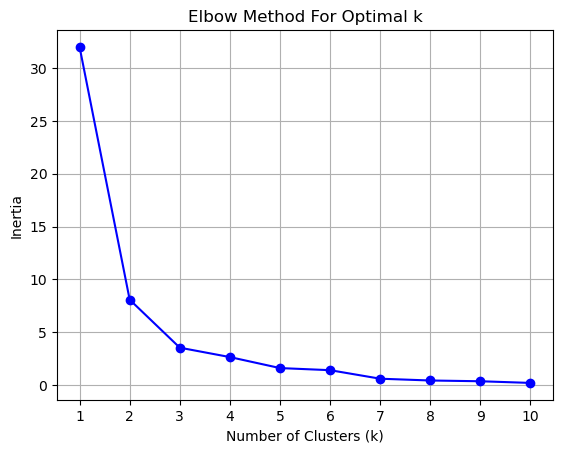

In [5]:
#Now before using K-Means clustering, we have to find the best value of K. That's why we use Elbow Method
inertias = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_preprocessed)
    inertias.append(kmeans.inertia_)
#Plotting the graph using Matplotlib
plt.plot(k_values, inertias, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.grid(True)
plt.xticks(k_values)
plt.show()


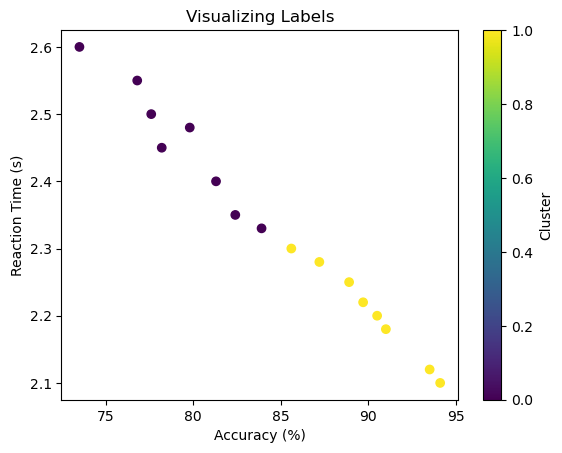

In [15]:
#From the graph we see, At K=1 to K=2 the value of intertia signeficantly drops. That's why we are choosing K=2
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_preprocessed)

# Visualize clusters, here the clusters are labeled as 0 and 1
plt.scatter(df["Accuracy (%)"], df["Reaction Time (s)"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Accuracy (%)")
plt.ylabel("Reaction Time (s)")
plt.title("Visualizing Labels")
plt.colorbar(label="Cluster")
plt.show()